# CORRELATION

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


life_expectancy = pd.read_csv(r"c:/users/danhaya/arewads/arewads-fellowship/life_expectancy.csv")

thresold = len(life_expectancy) * 0.05
col_to_drop = life_expectancy.columns[life_expectancy.isna().sum() <= thresold]
life_expectancy.dropna(subset = col_to_drop, inplace=True)

In [4]:
print(life_expectancy.isna().sum())

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         112
Prevelance of Undernourishment     532
CO2                                  0
Health Expenditure %                66
Education Expenditure %            968
Unemployment                       190
Corruption                        2179
Sanitation                        1171
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [5]:
col_with_missing_value = life_expectancy.columns[life_expectancy.isna().sum() > 0]

for col in col_with_missing_value:
    life_expectancy[col].fillna(life_expectancy[col].median())
print(life_expectancy.isna().sum())

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         112
Prevelance of Undernourishment     532
CO2                                  0
Health Expenditure %                66
Education Expenditure %            968
Unemployment                       190
Corruption                        2179
Sanitation                        1171
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64


In [7]:
life_expectancy['Year'] = pd.to_datetime(life_expectancy["Year"])

In [8]:
correlation = life_expectancy['Education Expenditure %'].corr(life_expectancy['Health Expenditure %'])
print(correlation)

0.4225371985412131


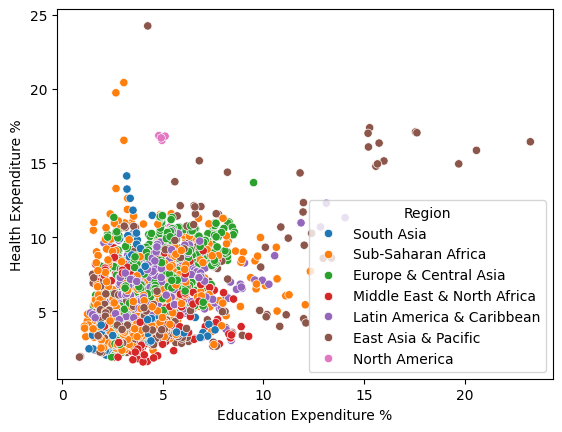

In [10]:
sns.scatterplot(data=life_expectancy,
                x = 'Education Expenditure %',
                y='Health Expenditure %',
                hue= 'Region')

plt.show()

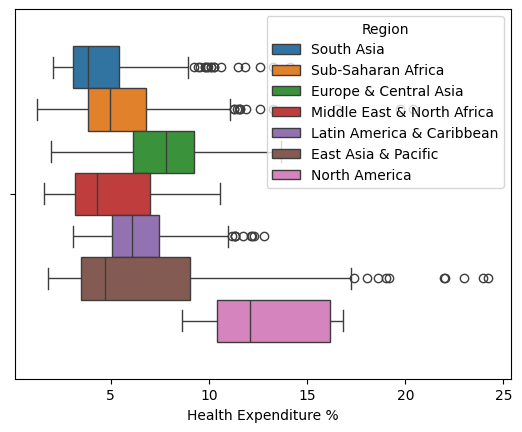

In [13]:
sns.boxplot(data = life_expectancy,
            x = 'Health Expenditure %',
            hue= 'Region')
plt.show()

In [16]:
print(life_expectancy.columns)

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')


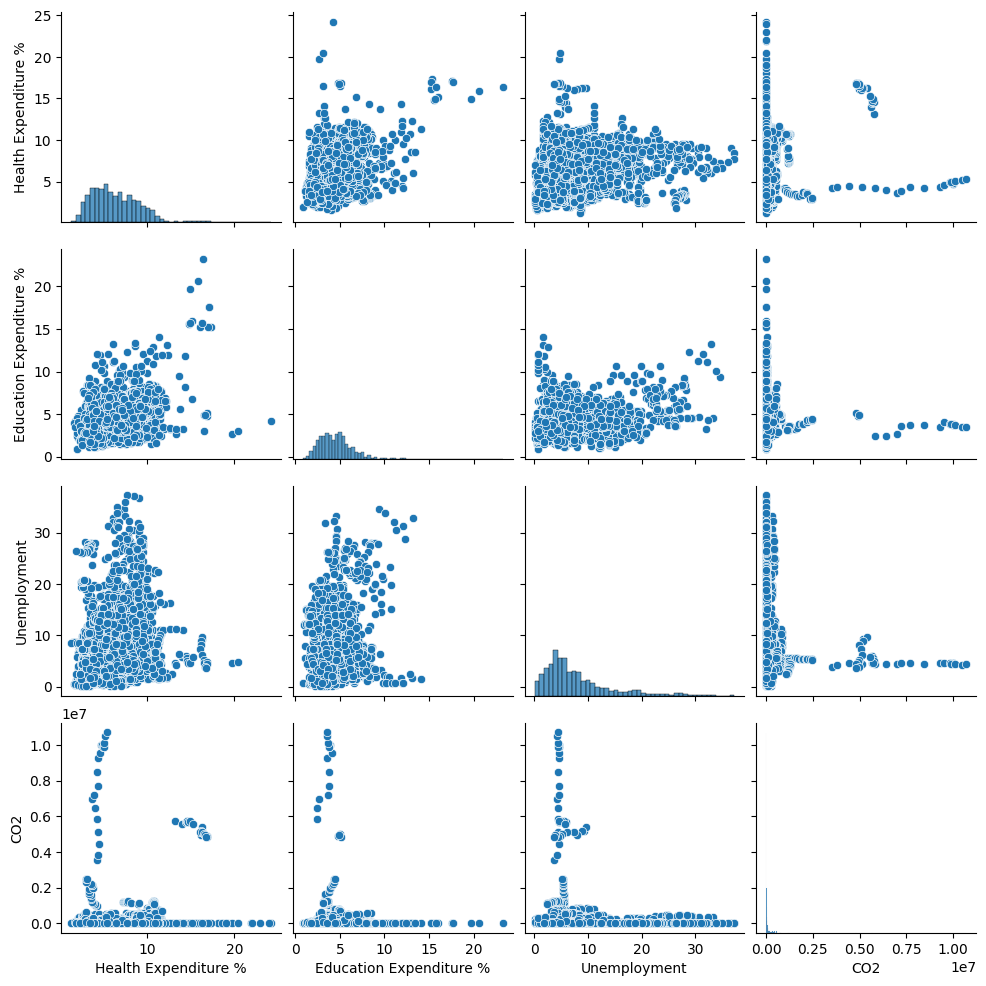

In [17]:
sns.pairplot(data=life_expectancy,
             vars= ['Health Expenditure %', 'Education Expenditure %', 'Unemployment', 'CO2'])
plt.show()
